# Evaluates trained models.
Makes use of the saved histories and renders them for visual comparison.

In [1]:
%matplotlib inline
from cgmcore.utils import find_timestamps_of_trained_models, find_all_history_paths, plot_date_times, get_mean_error

WARNING! VTK not available. This might limit the functionality.


In [2]:
output_path = "../data/output/"

# Find all date-times.
Extracts the timestamps. Different timestamps will represent different models/trainings.

In [3]:
date_times = find_timestamps_of_trained_models(output_path)
date_times = date_times[-3:]
print(date_times)

['20181113-0842', '20181114-1526', '20181203-0907']


# Processes the histories of date-times.

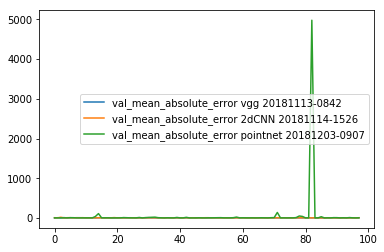

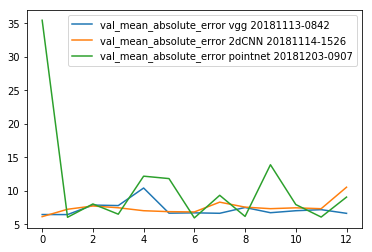

Done.


In [9]:
history_paths = find_all_history_paths(output_path)

# Render MAE for whole histories.
plot_date_times(date_times, history_paths, start_index=0, end_index=98, key_suffix="val_mean_absolute_error")

# Render MAE for the histories while skipping the first 50 epochs.
plot_date_times(date_times, history_paths, start_index=85, end_index=98, key_suffix="val_mean_absolute_error")
print("Done.")

In [5]:
get_mean_error(date_times, history_paths, start_index=50, end_index=98, key_suffix="val_mean_absolute_error")
print("Done.")

Avg val_mean_absolute_error vgg 20181113-0842 between epoch 50 and 98 = 7.496052736043928
Avg val_mean_absolute_error 2dCNN 20181114-1526 between epoch 50 and 98 = 7.625794996817905
Avg val_mean_absolute_error pointnet 20181203-0907 between epoch 50 and 98 = 117.1963268339634
Done.
